In [7]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt
import os
pwd = os.getcwd()

fileNames = ["S","T","ST","G","GS","GT","GST","C","CS","CT","CST"]
names = ["Swap","2-Opt","Swap -> 2-Opt","Greedy","Greedy -> Swap","Greedy -> 2-Opt","Greedy -> Swap -> 2-Opt"
         , "Temperate","Temperate -> Swap","Temperate -> 2-Opt","Temperate -> Swap -> 2-Opt"]
colors = ["red","darkorange","gold","forestgreen","lightseagreen","dodgerblue","navy","indigo","deeppink","crimson","grey"]

moves = [[],[],[],[],[],[],[],[],[],[],[]]
for i in range(len(moves)):
    moves[i] = list(map(int,loadtxt(pwd + "/aqmaps"+fileNames[i]+"Moves.txt",dtype="str",delimiter="\n",unpack=False)))

dates = loadtxt(pwd + "/aqmapsDates.txt",dtype="str",delimiter="\n",unpack=False)

In [8]:
ind = int(np.where(dates == "15/06/2021")[0])
print(moves[6][ind])
print(moves[6][0])

78
98


Text(0.5,1,'A graph to show route performance of different high\ncomplexity algorithms for all unique days')

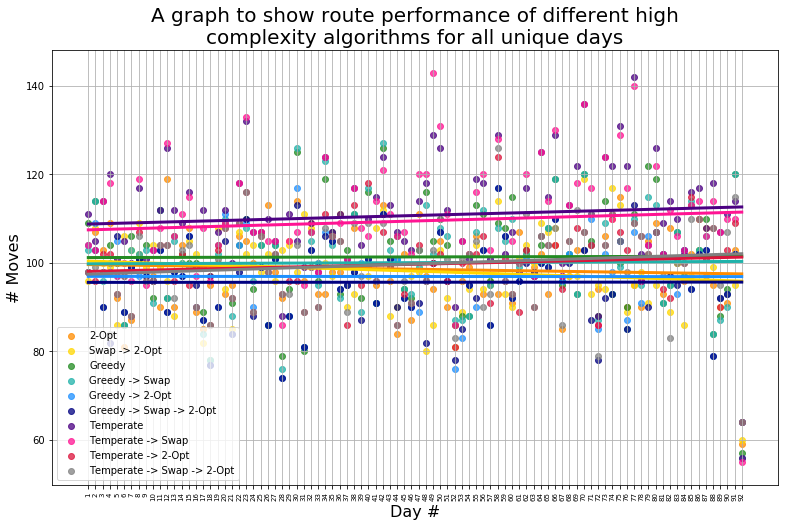

In [5]:
import seaborn as sns
import pandas as pd
x = range(92)

plt.rcParams["figure.figsize"] = (13,8)

for i in range(1,11):
    plt.scatter(x,moves[i][0:92],c=colors[i],label=names[i],alpha=0.75)
    plt.plot(x, np.poly1d(np.polyfit(x,moves[i][0:92],1))(np.unique(x)),c=colors[i],lw=3)

plt.grid(True)
plt.legend(loc="lower left")
plt.xlabel("Day #",fontsize=16)
plt.ylabel("# Moves",fontsize=16)
plt.xticks(x,range(1,93),rotation=90,fontsize=7)
plt.title("A graph to show route performance of different algorithms for all unique days",fontsize=20)


Text(0.5,1,'A graph to show route performance of different low\ncomplexity algorithms for all unique days')

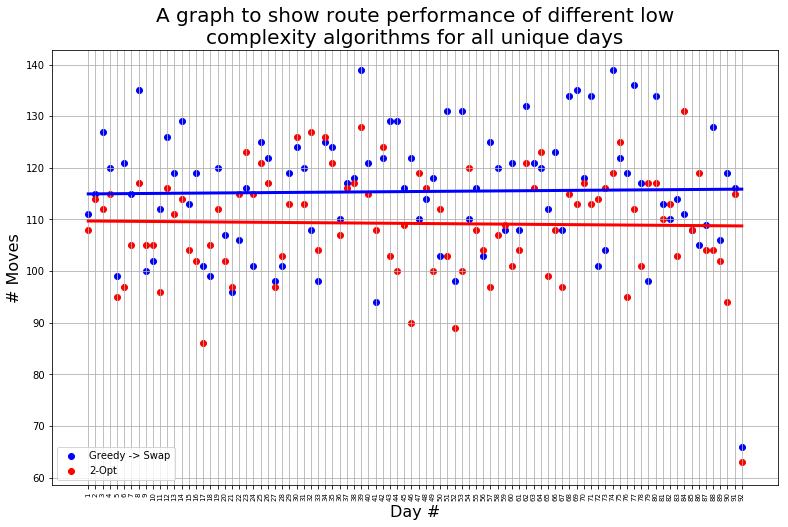

In [127]:
ys=[3,7]

for y in ys:
    plt.scatter(x,moves[y][0:92],c=colors[y],label=names[y])
    plt.plot(x, np.poly1d(np.polyfit(x,moves[y][0:92],1))(np.unique(x)),c=colors[y],lw=3)

plt.grid(True)
plt.legend(loc="lower left")
plt.xlabel("Day #",fontsize=16)
plt.ylabel("# Moves",fontsize=16)
plt.xticks(x,range(1,93),rotation=90,fontsize=7)
plt.title("A graph to show route performance of different low\ncomplexity algorithms for all unique days",fontsize=20)


Text(0.5,1,'A graph to show the performance of all algorithms for all days in 2020 & 2021')

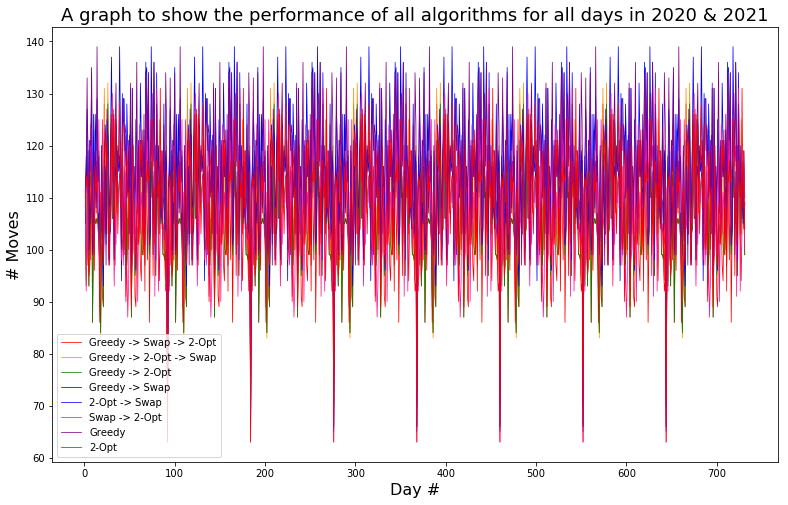

In [132]:
for i in range(8):
    plt.plot(range(1,732),moves[i],c=colors[i],label=names[i],lw=0.75)
    
plt.legend(loc="lower left")
plt.xlabel("Day #",fontsize=16)
plt.ylabel("# Moves",fontsize=16)
plt.title("A graph to show the performance of all algorithms for all days in 2020 & 2021",fontsize=18)


In [28]:
#Print means, max, and min

for i in range(11):
    print(names[i])
    print(round(np.mean(moves[i]),2))
    print(max(moves[i]))
    print(min(moves[i]))
    print()

Swap
149.51
150
99

2-Opt
98.65
119
59

Swap -> 2-Opt
98.23
119
60

Greedy
101.45
126
57

Greedy -> Swap
100.15
127
56

Greedy -> 2-Opt
97.01
117
64

Greedy -> Swap -> 2-Opt
95.71
117
64

Temperate
110.78
142
56

Temperate -> Swap
109.55
143
55

Temperate -> 2-Opt
99.73
124
64

Temperate -> Swap -> 2-Opt
99.79
126
64

